In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.patches as patches


In [4]:
df= pd.read_csv('eplpass.csv')

In [16]:
df.head()

,Squad,# Pl,90s,TotCmp,TotAtt,Cmp%,TotDist,PrgDist,ShtCmp,ShtAtt,...,lonCmp%,Ast,xAG,xA,A-xAG,KP,3-Jan,PPA,CrsPA,PrgP
0,Arsenal,24,31,13583,16217,83.8,222487,70741,6873,7521,...,51.1,43,37.0,36.8,6.0,337,1109,343,61,1487
1,Aston Villa,28,31,12206,14740,82.8,208370,72056,5621,6235,...,53.0,36,34.5,30.4,1.5,288,925,258,49,1078
2,Bournemouth,28,31,10303,13552,76.0,187776,71266,4452,5174,...,48.0,37,38.6,30.6,-1.6,377,1023,279,81,1222
3,Brentford,27,31,11103,14203,78.2,202513,77468,4906,5655,...,52.9,32,34.2,31.4,-2.2,270,920,269,74,1127
4,Brighton,31,31,12837,15589,82.3,219346,74972,6145,6801,...,55.2,31,32.1,30.6,-1.1,296,952,273,71,1249


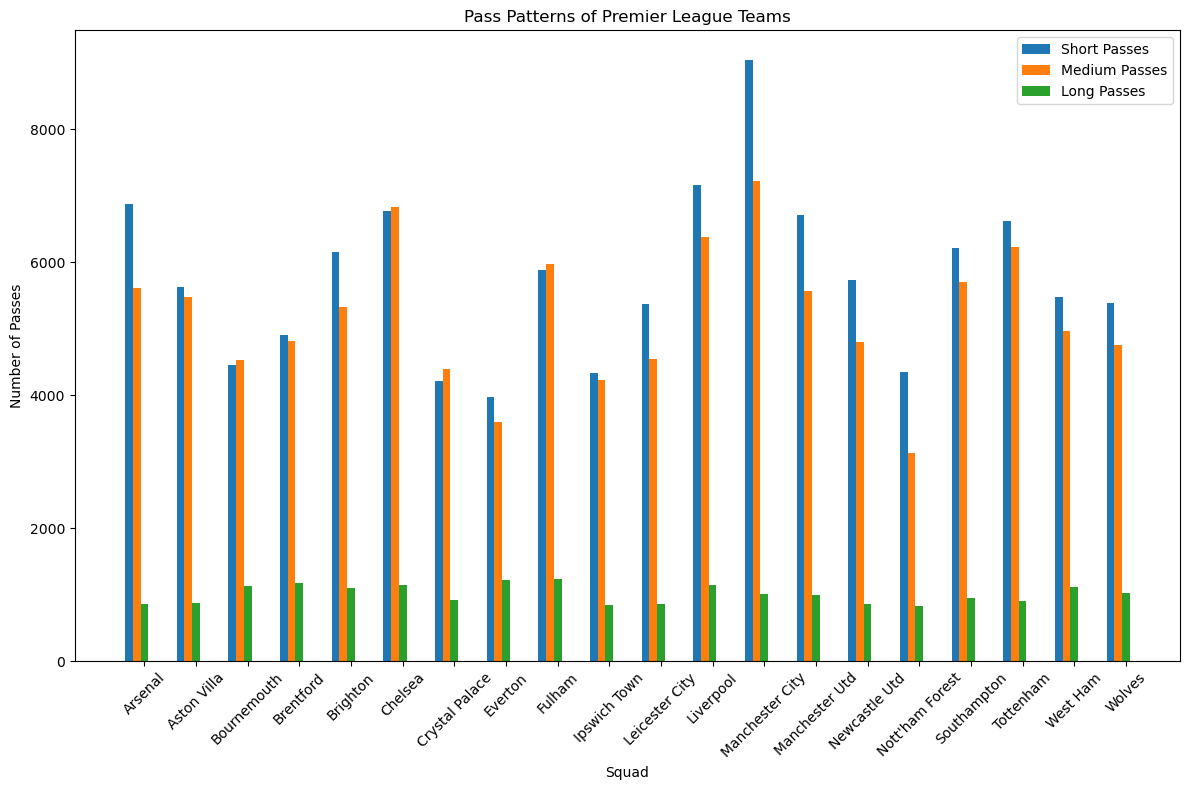

In [9]:
# Set up the figure and axis
plt.figure(figsize=(12, 8))

# Plot each pass type as a bar
bar_width = 0.15
index = np.arange(len(df))

plt.bar(index, df["ShtCmp"], width=bar_width, label="Short Passes")
plt.bar(index + bar_width, df["MedCmp"], width=bar_width, label="Medium Passes")
plt.bar(index + 2 * bar_width, df["LonCmp"], width=bar_width, label="Long Passes")


# Add labels and title
plt.xlabel("Squad")
plt.ylabel("Number of Passes")
plt.title("Pass Patterns of Premier League Teams")
plt.xticks(index + 2 * bar_width, df["Squad"], rotation=45)
plt.legend()

# Show the plot
plt.tight_layout()
plt.show()

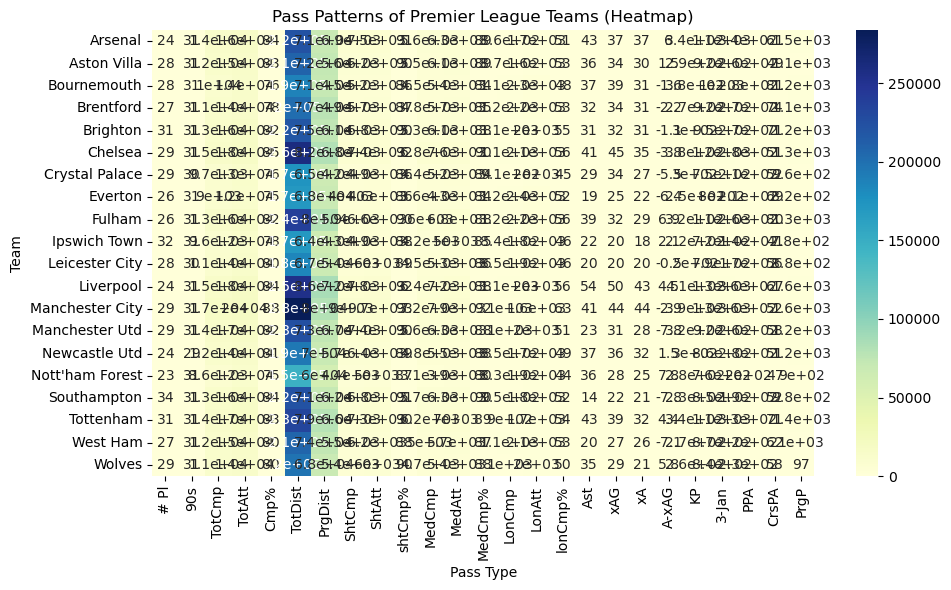

In [11]:
# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Create a heatmap
sns.heatmap(df.set_index("Squad"), annot=True, cmap="YlGnBu")

# Add labels and title
plt.xlabel("Pass Type")
plt.ylabel("Team")
plt.title("Pass Patterns of Premier League Teams (Heatmap)")

# Show the plot
plt.tight_layout()
plt.show()

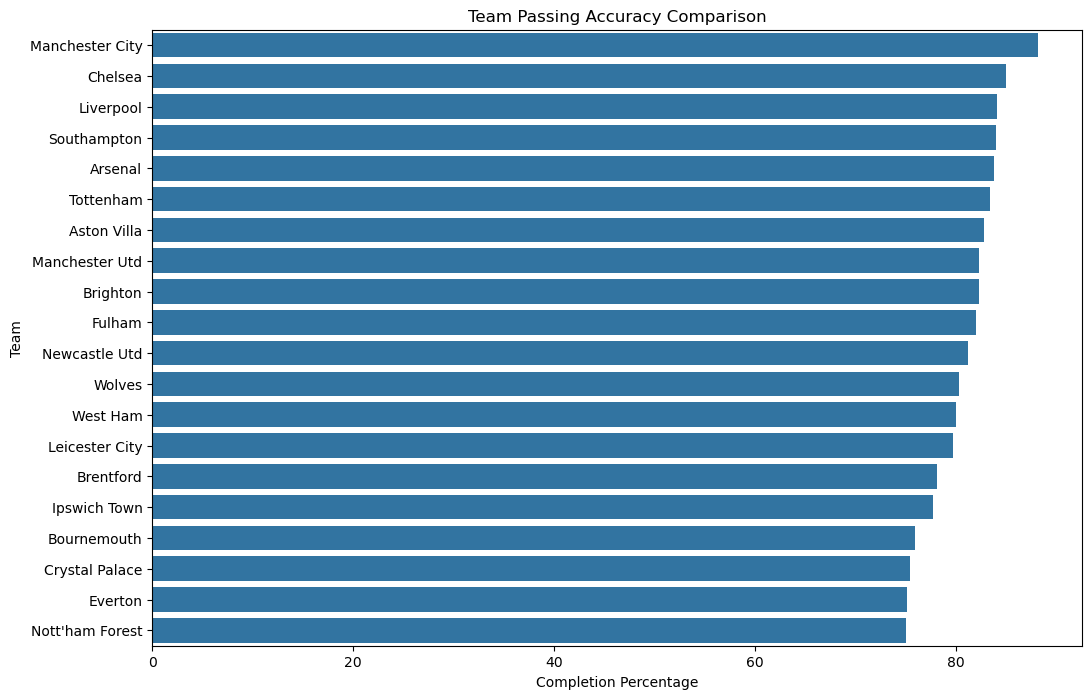

In [13]:
plt.figure(figsize=(12,8))
sns.barplot(x='Cmp%', y='Squad', data=df.sort_values('Cmp%', ascending=False))
plt.title('Team Passing Accuracy Comparison')
plt.xlabel('Completion Percentage')
plt.ylabel('Team')
plt.show()

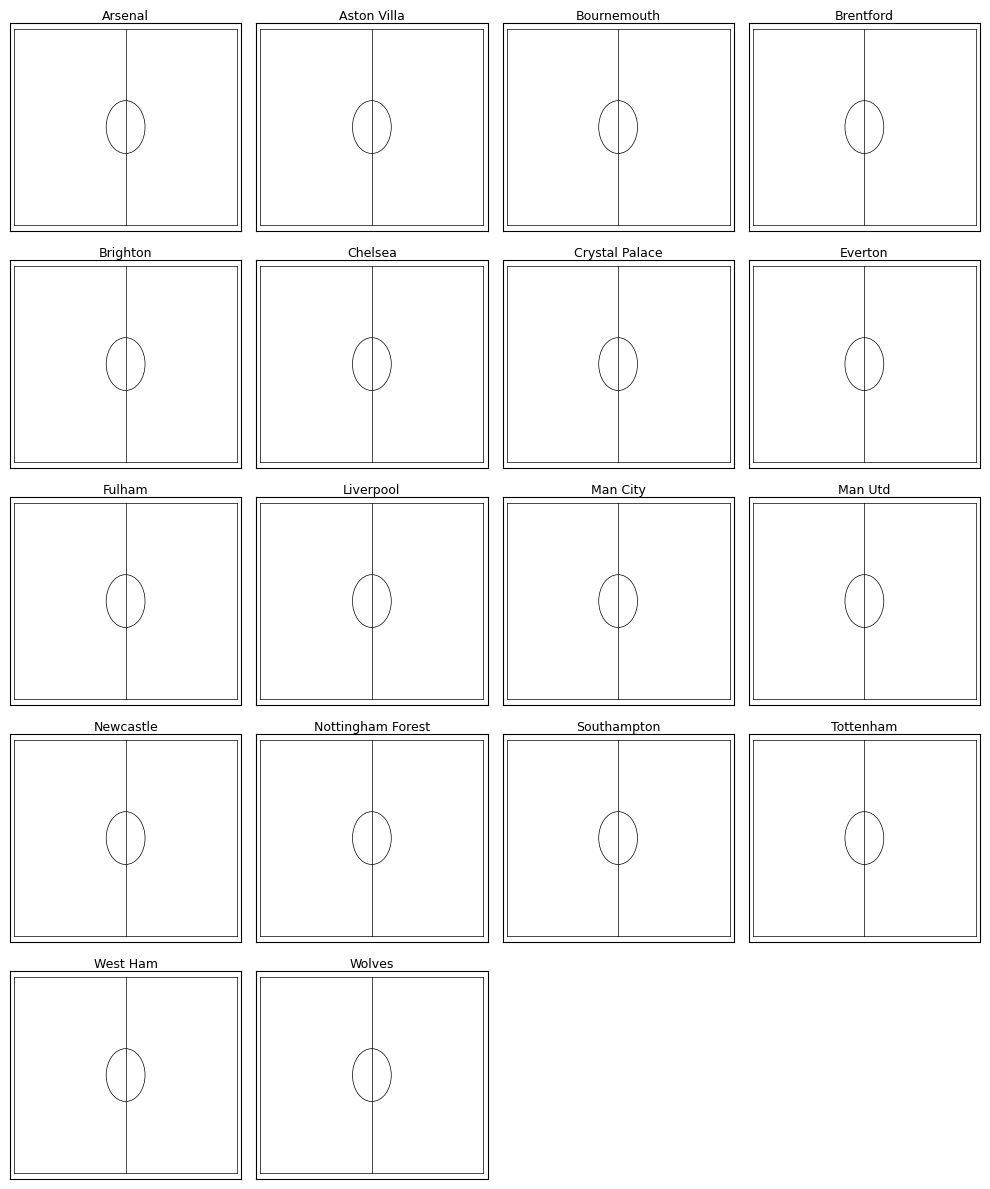

In [22]:
# Followed instructions from a youtube video by ciao.football
# Set up the pitch dimensions
pitch_length = 105
pitch_width = 68

def draw_pitch(ax, team_name):
    # Pitch outline
    ax.plot([0,0],[0,pitch_width], color="black", linewidth=0.5)
    ax.plot([0,pitch_length],[pitch_width,pitch_width], color="black", linewidth=0.5)
    ax.plot([pitch_length,pitch_length],[pitch_width,0], color="black", linewidth=0.5)
    ax.plot([pitch_length,0],[0,0], color="black", linewidth=0.5)
    
    # Center line and circle
    ax.plot([pitch_length/2,pitch_length/2],[0,pitch_width], color="black", linewidth=0.5)
    center_circle = plt.Circle((pitch_length/2,pitch_width/2), 9.15, 
                             color="black", fill=False, linewidth=0.5)
    ax.add_patch(center_circle)
    
    
    
    ax.set_title(team_name, fontsize=9, pad=3)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlim(-2, pitch_length+2)
    ax.set_ylim(-2, pitch_width+2)

# Create compact grid of all teams
fig, axes = plt.subplots(5, 4, figsize=(10, 12))
plt.subplots_adjust(wspace=0.1, hspace=0.4)

teams = [
    'Arsenal', 'Aston Villa', 'Bournemouth', 'Brentford',
    'Brighton', 'Chelsea', 'Crystal Palace', 'Everton',
    'Fulham', 'Liverpool', 'Man City', 'Man Utd',
    'Newcastle', 'Nottingham Forest', 'Southampton', 'Tottenham',
    'West Ham', 'Wolves'
]

# Draw each pitch
for idx, team in enumerate(teams):
    row = idx // 4
    col = idx % 4
    draw_minimal_pitch(axes[row, col], team)

# Hide empty subplots
for idx in range(len(teams), 20):
    row = idx // 4
    col = idx % 4
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()